In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter

import seaborn as sns

import datetime
import os

In [3]:
filepath = os.path.join('Data', 'distance_wl_0003_20250806_truncate.csv')
df_full = pd.read_csv(filepath, header = None, on_bad_lines='skip')
df_full.columns = ['Unix_Time', 'Distance (cm)', 'Battery (V)', 'Charge (%)']
df_full.head()

,Unix_Time,Distance (cm),Battery (V),Charge (%)
0,1712345274,35.22778,4.08,90.86
1,1712347228,203.52499,4.08,90.70
2,1712350819,159.83333,4.08,90.70
3,1712354419,135.64722,4.08,90.70
4,1712358019,121.57500,4.08,90.54


In [4]:
df_full['datetime (ET)'] = pd.to_datetime(df_full['Unix_Time'], unit='s').dt.tz_localize('UTC').dt.tz_convert('America/New_York')

In [5]:
df_full.head()

,Unix_Time,Distance (cm),Battery (V),Charge (%),datetime (ET)
0,1712345274,35.22778,4.08,90.86,2024-04-05 15:27:54-04:00
1,1712347228,203.52499,4.08,90.70,2024-04-05 16:00:28-04:00
2,1712350819,159.83333,4.08,90.70,2024-04-05 17:00:19-04:00
3,1712354419,135.64722,4.08,90.70,2024-04-05 18:00:19-04:00
4,1712358019,121.57500,4.08,90.54,2024-04-05 19:00:19-04:00


In [6]:
df_full.tail()

,Unix_Time,Distance (cm),Battery (V),Charge (%),datetime (ET)
11697,1754485219,129.51250,4.05,85.20,2025-08-06 09:00:19-04:00
11698,1754488821,141.61667,4.05,85.20,2025-08-06 10:00:21-04:00
11699,1754492419,164.43056,4.04,85.05,2025-08-06 11:00:19-04:00
11700,1754496018,193.69722,4.06,85.05,2025-08-06 12:00:18-04:00
11701,1754499620,215.46527,4.08,85.05,2025-08-06 13:00:20-04:00


In [15]:
end_date = df_full['datetime (ET)'].max()
end_date

Timestamp('2025-08-06 13:00:20-0400', tz='America/New_York')

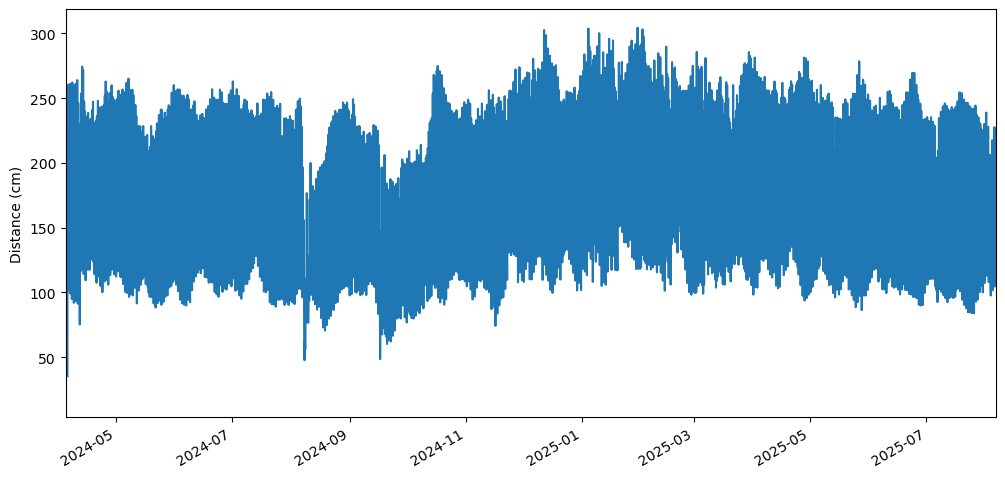

In [19]:
fig, axs = plt.subplots(figsize = (12, 6))
axs.plot(df_full['datetime (ET)'], df_full['Distance (cm)'])

axs.set_ylabel('Distance (cm)')
axs.set_xlim([datetime.date(2024, 4, 5), end_date])

fig.autofmt_xdate()